# 1 - First Section

Importing Libraries

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

Defining Sturgens Function

In [55]:
def get_sturges_bins(data: pd.Series) -> int:
    """
    Calculates the number of bins for a histogram using Sturges' rule.

    Args:
        data: A pandas Series representing the data for which the number of bins is to be calculated.

    Returns:
        An integer representing the optimal number of bins for a histogram.
    """
    num_bins = int(1 + 3.3 * np.log10(len(data)))
    return num_bins

Loading data

In [56]:
smart_tv_data = pd.read_csv('../csv/dataset_smart-tv.csv', usecols = ['bytes_up','bytes_down'])
chromecast_data = pd.read_csv('../csv/dataset_chromecast.csv', usecols = ['bytes_up','bytes_down'])

Data Preprocessing

In [57]:
smart_tv_data += 1
chromecast_data += 1
smart_tv_data = np.log10(smart_tv_data)
chromecast_data = np.log10(chromecast_data)

Ploting Histograms of integral dataset

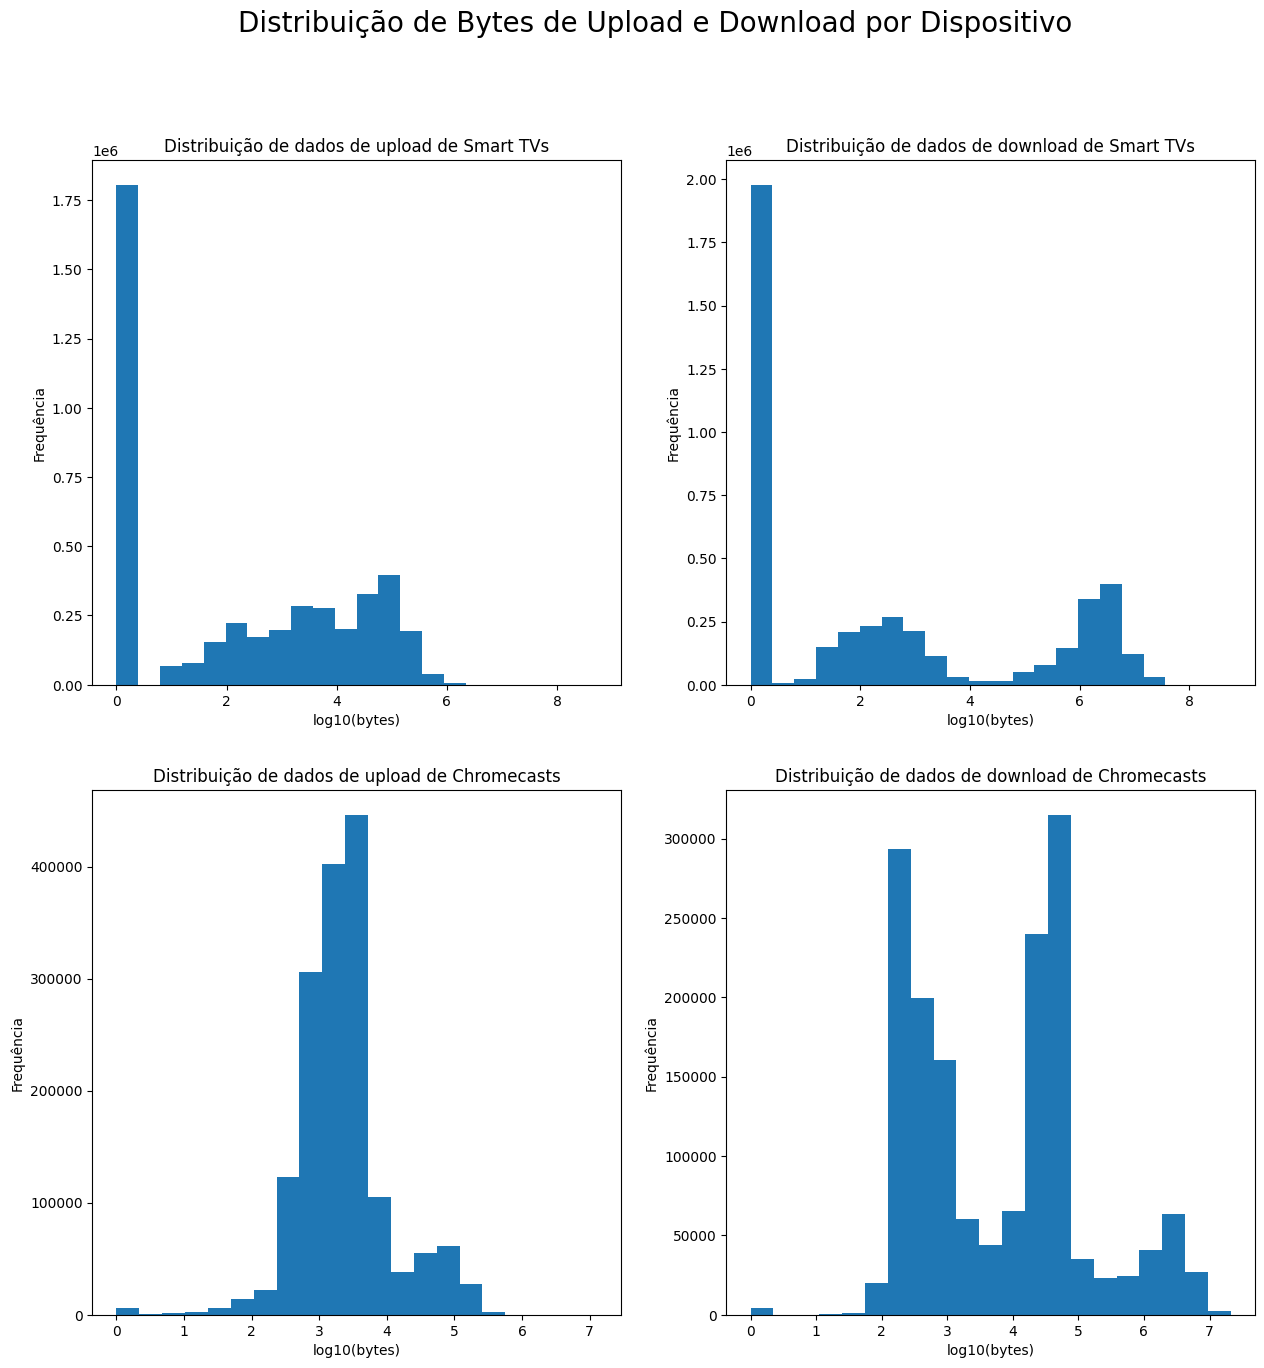

In [58]:
def plot_histogram(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Plots a histogram of the given data on the given axis.

    Args:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    bins = get_sturges_bins(data)
    ax.hist(data, bins=bins)
    ax.set_title(title)
    ax.set_xlabel("log10(bytes)")
    ax.set_ylabel("Frequência")

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Distribuição de Bytes de Upload e Download por Dispositivo', fontsize=20)

plot_histogram(ax[0][0], smart_tv_data['bytes_up'], "Distribuição de dados de upload de Smart TVs")
plot_histogram(ax[0][1], smart_tv_data['bytes_down'], "Distribuição de dados de download de Smart TVs")
plot_histogram(ax[1][0], chromecast_data['bytes_up'], "Distribuição de dados de upload de Chromecasts")
plot_histogram(ax[1][1], chromecast_data['bytes_down'], "Distribuição de dados de download de Chromecasts")

plt.show()    

Ploting Empirical Cumulative Distribution Function of Integral Dataset

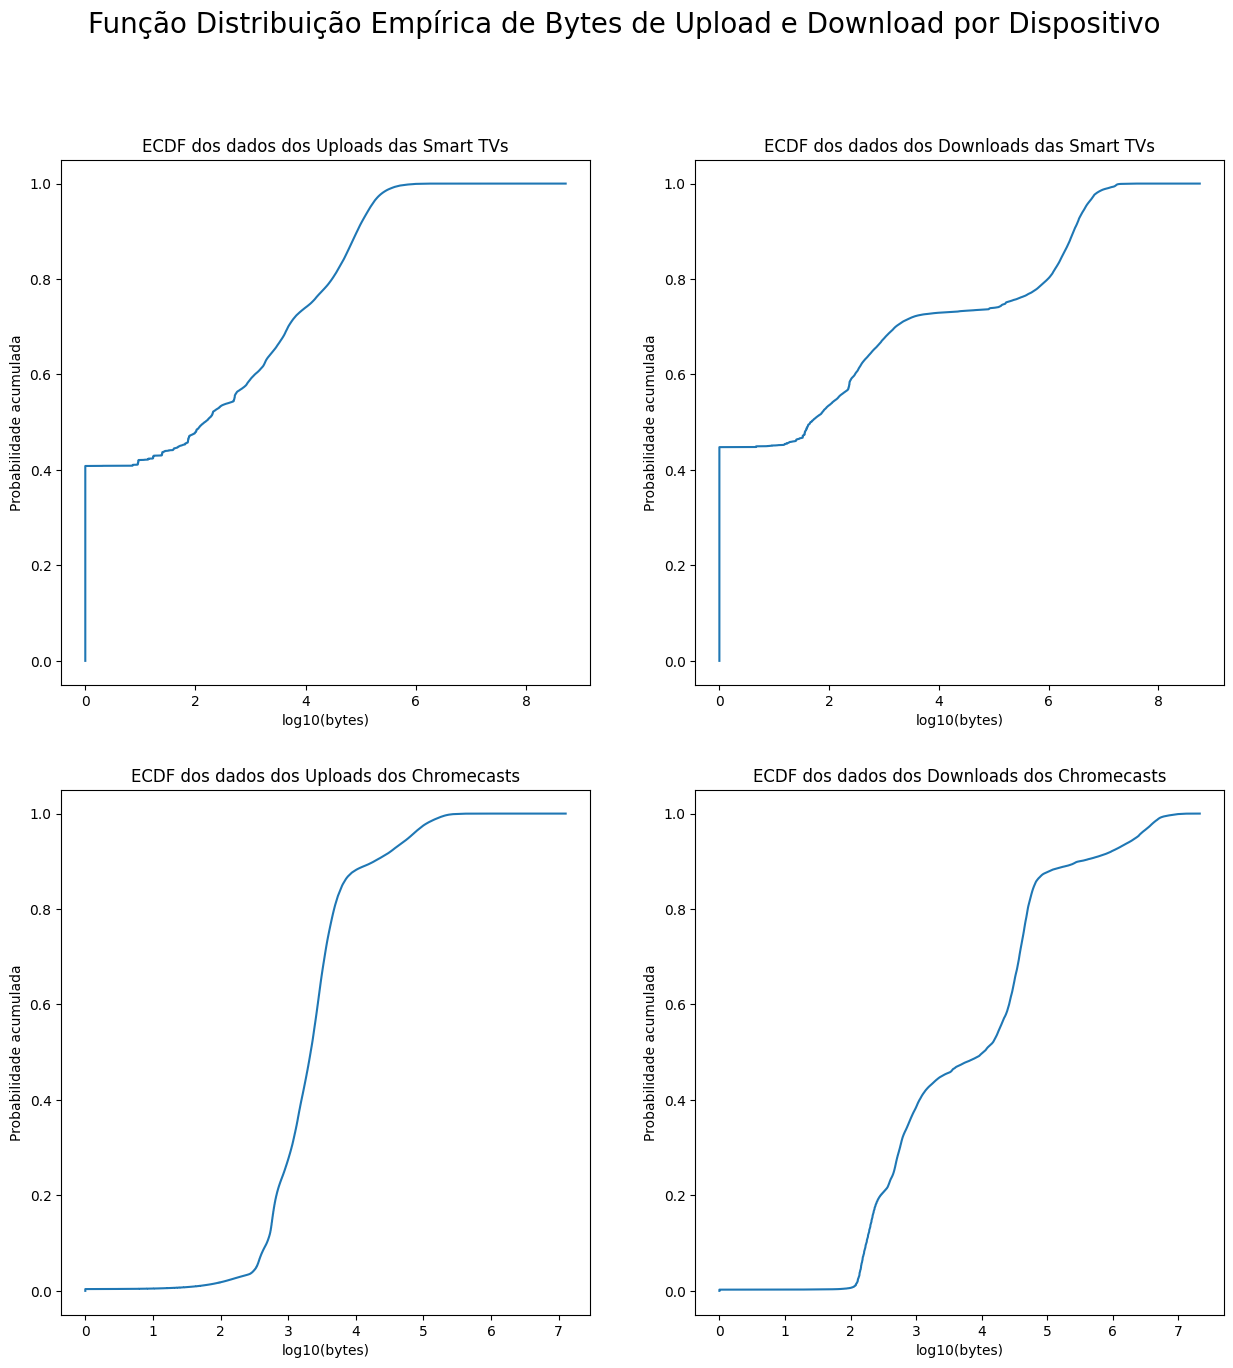

In [59]:
def plot_ecdf(ax: plt.Axes, data: pd.Series, title: str) -> None:
    """
    Creates a plot with the empirical cumulative distribution function (ECDF) of the given data.
    
    Parameters:
        ax: A matplotlib Axes object representing the axis on which the histogram is to be plotted.
        data: A pandas Series representing the data to be plotted.
        title: A string representing the title of the plot.

    Returns:
        None
    """
    ecdf = ECDF(data)
    ax.plot(ecdf.x, ecdf.y)
    ax.set_title(title)
    ax.set_xlabel("log10(bytes)")
    ax.set_ylabel("Probabilidade acumulada")

fig, ax = plt.subplots(2, 2, figsize=(15, 15))

fig.suptitle('Função Distribuição Empírica de Bytes de Upload e Download por Dispositivo', fontsize=20)

plot_ecdf(ax[0][0], smart_tv_data['bytes_up'], "ECDF dos dados dos Uploads das Smart TVs")
plot_ecdf(ax[0][1], smart_tv_data['bytes_down'], "ECDF dos dados dos Downloads das Smart TVs")
plot_ecdf(ax[1][0], chromecast_data['bytes_up'], "ECDF dos dados dos Uploads dos Chromecasts")
plot_ecdf(ax[1][1], chromecast_data['bytes_down'], "ECDF dos dados dos Downloads dos Chromecasts")
    
plt.show()

Ploting Boxplot of Integral Dataset

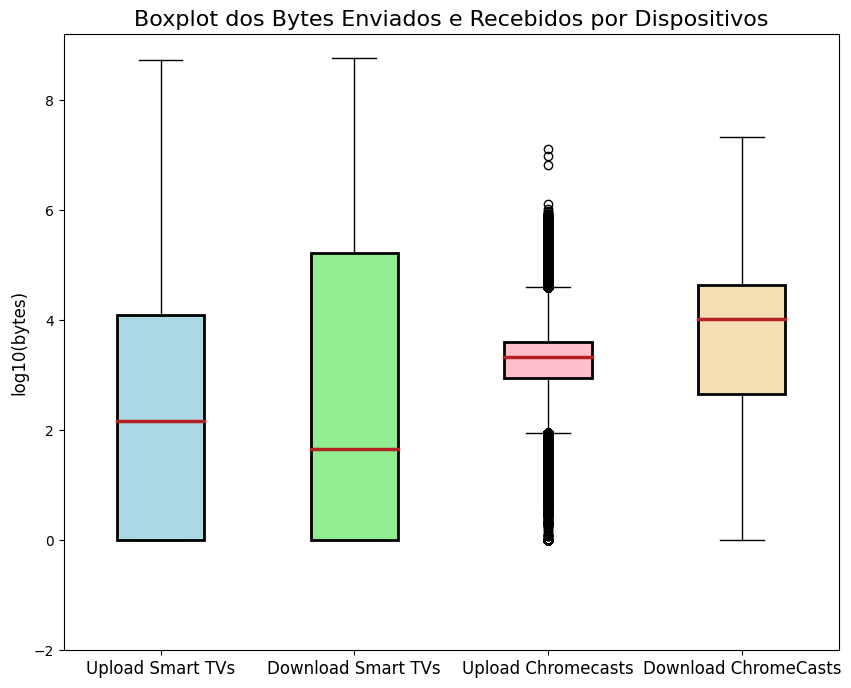

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))

# Define boxplot styles
boxprops = dict(linestyle='-', linewidth=2, color='black')
medianprops = dict(linestyle='-', linewidth=2.5, color='firebrick')

# Create boxplot
bp = ax.boxplot([smart_tv_data['bytes_up'], smart_tv_data['bytes_down'], chromecast_data['bytes_up'], chromecast_data['bytes_down']],
                boxprops=boxprops, medianprops=medianprops, patch_artist=True)

# Set colors for box and whiskers
colors = ['lightblue', 'lightgreen', 'pink', 'wheat']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Add labels and title
ax.set_xticklabels(['Upload Smart TVs', 'Download Smart TVs', 'Upload Chromecasts', 'Download ChromeCasts'], fontsize=12)
ax.set_ylabel('log10(bytes)', fontsize=12)
ax.set_title('Boxplot dos Bytes Enviados e Recebidos por Dispositivos', fontsize=16)

# Hide grid and set y-axis limits
ax.grid(False)
ax.set_ylim(bottom=-2)

# Show plot
plt.show()

In [61]:
means = {
    'smart_tv_up': np.mean(smart_tv_data['bytes_up']),
    'smart_tv_down': np.mean(smart_tv_data['bytes_down']),
    'chromecast_up': np.mean(chromecast_data['bytes_up']),
    'chromecast_down': np.mean(chromecast_data['bytes_down'])
}

means

{'smart_tv_up': 2.158288206507635,
 'smart_tv_down': 2.351678620482737,
 'chromecast_up': 3.3502996618084153,
 'chromecast_down': 3.800045706037558}

In [62]:
vars = {
    'smart_tv_up': np.var(smart_tv_data['bytes_up']),
    'smart_tv_down': np.var(smart_tv_data['bytes_down']),
    'chromecast_up': np.var(chromecast_data['bytes_up']),
    'chromecast_down': np.var(chromecast_data['bytes_down'])
}

vars

{'smart_tv_up': 4.110138414147299,
 'smart_tv_down': 6.721322376032034,
 'chromecast_up': 0.45996836246102296,
 'chromecast_down': 1.663894572605984}

In [63]:
stds = {
    'smart_tv_up': np.std(smart_tv_data['bytes_up']),
    'smart_tv_down': np.std(smart_tv_data['bytes_down']),
    'chromecast_up': np.std(chromecast_data['bytes_up']),
    'chromecast_down': np.std(chromecast_data['bytes_down'])
}

stds

{'smart_tv_up': 2.0273476303158517,
 'smart_tv_down': 2.5925513256311885,
 'chromecast_up': 0.6782096744083078,
 'chromecast_down': 1.2899203745216152}